In [2]:
import itertools
import operator
import sys
import os
import numpy as np
sys.path.append("../src")
from glob import glob
import pandas as pd
import json
from matplotlib import pyplot as plt

In [3]:
search_root = "/checkpoint/jth/job_staging/neuraldb_expts/experiment=*oracle*"
checkpoint_name = "metrics_test.json"
files = glob("{}*/**/{}".format(search_root,checkpoint_name), recursive=True)


print(len(files))

40


In [4]:
def expand(idx,chunk):

  #elif idx == 1:
  #  return ["experiment={}".format(chunk)]
  if chunk.startswith("seed-"):
    return ["seed={}".format(chunk.replace("seed-",""))]
  elif "," in chunk:
    return chunk.split(",")
  elif "=" in chunk:
    return [chunk]
  return []

experiments = []
for file in files:
    chunks = file.replace(search_root,"").split("/")
    chunks = itertools.chain(*[expand(idx, chunk) for idx, chunk in enumerate(chunks)])

    data = {k:v for k,v in (chunk.split("=") for chunk in chunks)}
    data["file"] = file
    data['dir'] = os.path.dirname(file)
    experiments.append(data)

In [11]:
for experiment in experiments:
    with open(experiment['file']) as f:
        results = json.load(f)

    experiment["EM"] = results['test']["EM"]

    for k,v in results['test']["raw"]["relation_type"].items():
        experiment["breakdown_{}".format(k)] = np.mean(v)

    for k,v in results['test']["raw"]["query_type"].items():
        experiment["query_{}".format(k)] = np.mean(v)

    print(experiment["experiment"])
print(len(experiments))

oracle_concat
oracle_concat
oracle_concat
oracle_concat
oracle_concat
oracle_concat
oracle_concat
oracle_concat
oracle_concat
oracle_concat
oracle_concat
oracle_concat
oracle_concat
oracle_concat
oracle_concat
oracle_concat
oracle_concat
oracle_concat
oracle_concat
oracle_concat
oracle_fusion
oracle_fusion
oracle_fusion
oracle_fusion
oracle_fusion
oracle_fusion
oracle_fusion
oracle_fusion
oracle_fusion
oracle_fusion
oracle_fusion
oracle_fusion
oracle_fusion
oracle_fusion
oracle_fusion
oracle_fusion
oracle_fusion
oracle_fusion
oracle_fusion
oracle_fusion
40


In [14]:
model = "oracle_concat"

In [17]:
results = pd.DataFrame(experiments).fillna(0)
results = results[results["experiment"] == model]
cols = {col:[np.mean, np.std] for col in filter(lambda col: col == "EM" or col.startswith("breakdown_") or col.startswith("query_"),results.columns)}
breakdown_cols = list(filter(lambda col: col.startswith("breakdown_"),results.columns))
query_cols = list(filter(lambda col: col.startswith("query_"),results.columns))
breakdown = pd.pivot_table(results, index=["experiment","model","lr","context"],aggfunc=cols)
breakdown.to_csv("results_oracle.csv")
print(len(breakdown_cols))
breakdown

EM           breakdown_born_in  \
                                          mean       std              mean   
experiment    model   lr     context                                         
oracle_concat t5-base 0.0005 100      0.914396  0.002790          0.915490   
                             50       0.940556  0.002026          0.950571   
                      0.0008 100      0.911660  0.002136          0.919219   
                             50       0.940676  0.002957          0.954160   

                                               breakdown_continent_born_in  \
                                           std                        mean   
experiment    model   lr     context                                         
oracle_concat t5-base 0.0005 100      0.008562                    0.857702   
                             50       0.005238                    0.930960   
                      0.0008 100      0.011748                    0.846095   
                             50       0.006749                    0.931921   

                                               breakdown_country_born_in  \
                                           std                      mean   
experiment    model   lr     context                                       
oracle_concat t5-base 0.0005 100      0.019092                  0.835664   
                             50       0.014170                  0.836393   
                      0.0008 100      0.011903                  0.836218   
                             50       0.014030                  0.846673   

                                               breakdown_dob            ...  \
                                           std          mean       std  ...   
experiment    model   lr     context                                    ...   
oracle_concat t5-base 0.0005 100      0.030299      0.482563  0.036389  ...   
                             50       0.016839      0.914130  0.016774  ...   
                      0.0008 100      0.010250      0.459916  0.012448  ...   
                             50       0.009999      0.918758  0.015240  ...   

                                     query_atomic           query_count  \
                                             mean       std        mean   
experiment    model   lr     context                                      
oracle_concat t5-base 0.0005 100         0.989844  0.001900    0.520826   
                             50          0.991952  0.000586    0.784980   
                      0.0008 100         0.990796  0.002210    0.518812   
                             50          0.993107  0.001656    0.793316   

                                               query_join            \
                                           std       mean       std   
experiment    model   lr     context                                  
oracle_concat t5-base 0.0005 100      0.019630   0.991144  0.004143   
                             50       0.007239   0.995272  0.003495   
                      0.0008 100      0.011014   0.992565  0.005403   
                             50       0.004239   0.995272  0.001954   

                                     query_min/max           query_set  \
                                              mean       std      mean   
experiment    model   lr     context                                     
oracle_concat t5-base 0.0005 100          0.680083  0.111236  0.656398   
                             50           0.923727  0.049926  0.849793   
                      0.0008 100          0.676185  0.009177  0.616362   
                             50           0.946559  0.051635  0.833815   

                                                
                                           std  
experiment    model   lr     context            
oracle_concat t5-base 0.0005 100      0.009064  
                             50       0.020216  
                      0.0008 100      0.013022  
                          

In [33]:
breakdown[query_cols].T["oracle_concat"]["t5-base"]["0.0005"]["50"].T.to_csv("results_oracle.csv")
breakdown[query_cols].T["oracle_concat"]["t5-base"]["0.0005"]["100"].T.to_csv("results_oracle_100.csv")

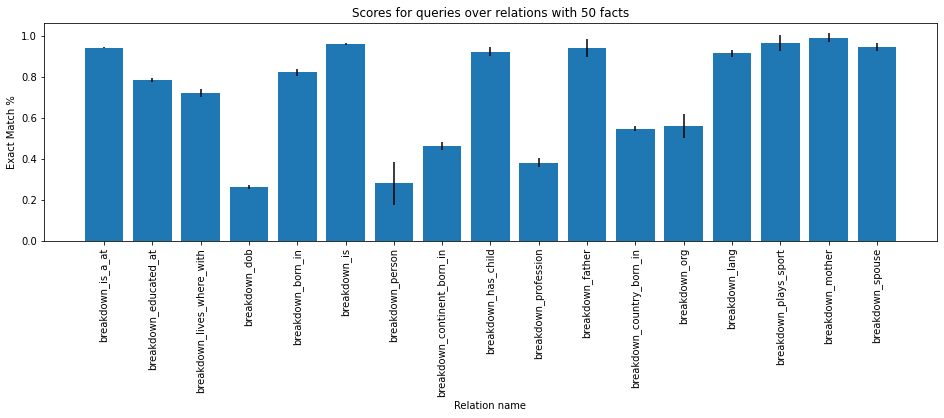

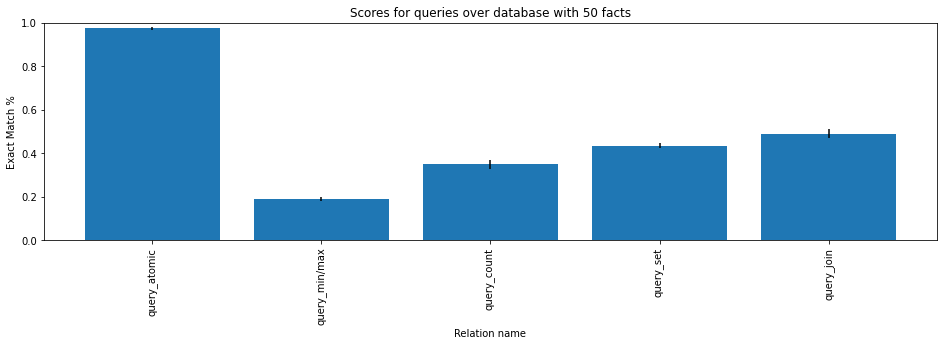

In [49]:

means = []
std = []

for col in breakdown_cols:

    means.append(breakdown[col]["mean"].T[model]["t5-base"]["50"])
    std.append(breakdown[col]["std"].T[model]["t5-base"]["50"])

plt.figure(figsize=(16,4))
plt.xticks(rotation=90)

plt.title("Scores for queries over relations with 50 facts")
plt.xlabel("Relation name")
plt.ylabel("Exact Match %")

plt.bar(breakdown_cols, means, yerr=std)
plt.show()


means = []
std = []

for col in query_cols:

    means.append(breakdown[col]["mean"].T[model]["t5-base"]["50"])
    std.append(breakdown[col]["std"].T[model]["t5-base"]["50"])

plt.figure(figsize=(16,4))
plt.xticks(rotation=90)


plt.title("Scores for queries over database with 50 facts")
plt.xlabel("Relation name")
plt.ylabel("Exact Match %")
plt.ylim(0,1)
plt.bar(query_cols, means, yerr=std)
plt.show()


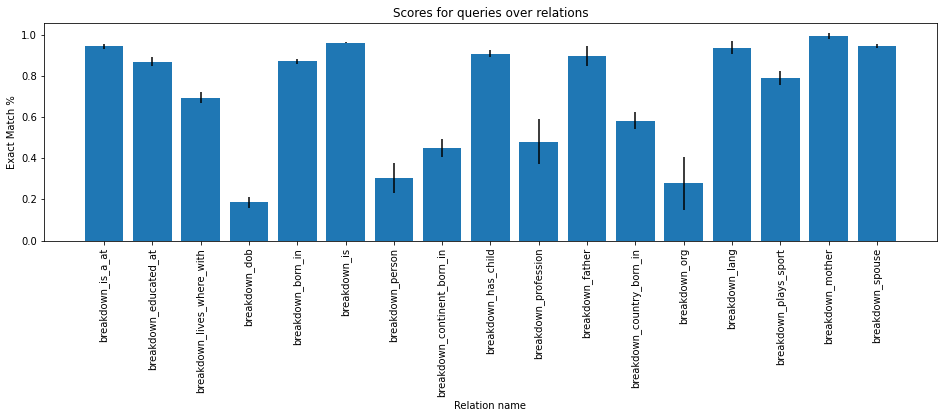

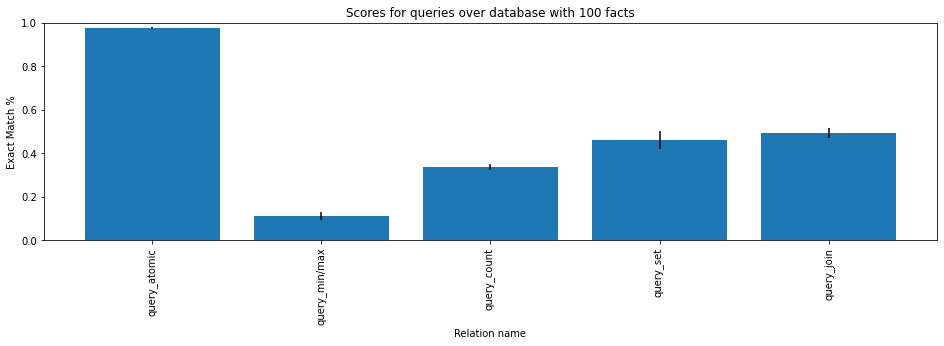

In [51]:

means = []
std = []

for col in breakdown_cols:

    means.append(breakdown[col]["mean"].T[model]["t5-base"]["100"])
    std.append(breakdown[col]["std"].T[model]["t5-base"]["100"])

plt.figure(figsize=(16,4))
plt.xticks(rotation=90)

plt.title("Scores for queries over relations")
plt.xlabel("Relation name")
plt.ylabel("Exact Match %")

plt.bar(breakdown_cols, means, yerr=std)
plt.show()


means = []
std = []

for col in query_cols:

    means.append(breakdown[col]["mean"].T[model]["t5-base"]["100"])
    std.append(breakdown[col]["std"].T[model]["t5-base"]["100"])

plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
plt.ylim(0,1)

plt.title("Scores for queries over database with 100 facts")
plt.xlabel("Relation name")
plt.ylabel("Exact Match %")

plt.bar(query_cols, means, yerr=std)
plt.show()